# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key	

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | chegdomyn
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | whakatane
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | saint-pierre
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | san jose del guaviare
Processing Record 12 of Set 1 | oranjemund
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | vilyuysk
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | atafu village
Processing Record 21 of Set 1 | papatowai
Pr

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,27.30,86,78,6.06,MU,1708696281
1,chegdomyn,51.1167,133.0167,-29.84,99,19,1.34,RU,1708696282
2,albany,42.6001,-73.9662,3.15,94,100,0.44,US,1708696283
3,whakatane,-37.9585,176.9854,15.28,99,17,1.95,NZ,1708696283
4,ushuaia,-54.8000,-68.3000,5.81,81,75,11.83,AR,1708696024


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,27.30,86,78,6.06,MU,1708696281
1,chegdomyn,51.1167,133.0167,-29.84,99,19,1.34,RU,1708696282
2,albany,42.6001,-73.9662,3.15,94,100,0.44,US,1708696283
3,whakatane,-37.9585,176.9854,15.28,99,17,1.95,NZ,1708696283
4,ushuaia,-54.8000,-68.3000,5.81,81,75,11.83,AR,1708696024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

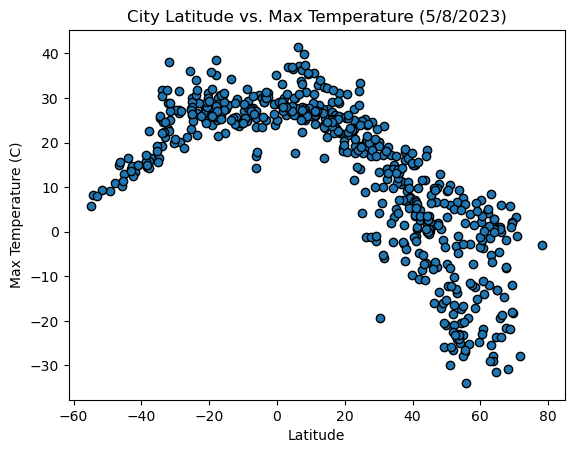

In [10]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (5/8/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# # Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

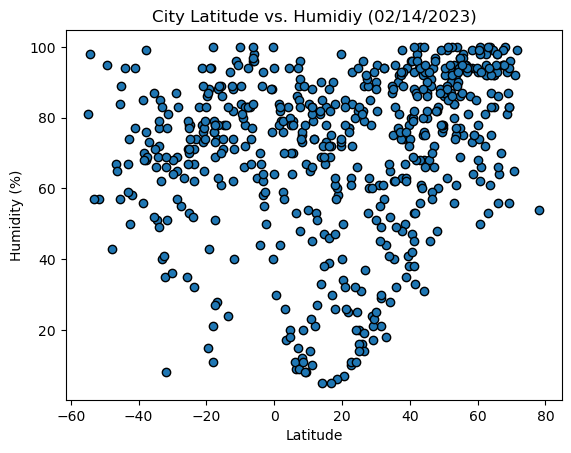

In [13]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
temp = city_data_df["Humidity"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Humidiy (02/14/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

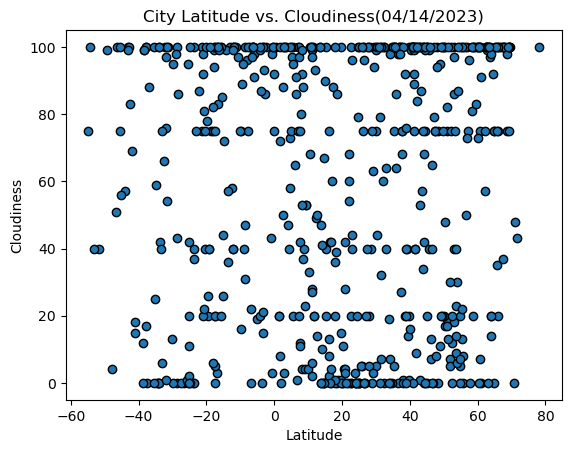

In [14]:
# Build the scatter plots for latitude vs. cloudiness
at = city_data_df["Lat"]
temp = city_data_df["Cloudiness"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(04/14/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

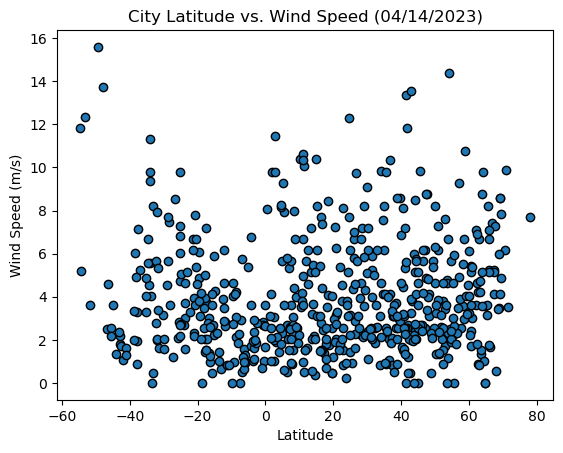

In [16]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
temp = city_data_df["Wind Speed"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (04/14/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_annotate, y_annotate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    text = plt.annotate(line_eq,(x_annotate, y_annotate),fontsize=15,color="red")
    print(f'The r-value is {rvalue}')
    return

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,chegdomyn,51.1167,133.0167,-29.84,99,19,1.34,RU,1708696282
2,albany,42.6001,-73.9662,3.15,94,100,0.44,US,1708696283
10,san jose del guaviare,2.5729,-72.6459,26.07,59,100,1.03,CO,1708696286
12,vilyuysk,63.7553,121.6247,-27.78,100,97,1.34,RU,1708696287
21,stanley,54.8680,-1.6985,7.66,69,20,5.66,GB,1708696203


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,27.30,86,78,6.06,MU,1708696281
3,whakatane,-37.9585,176.9854,15.28,99,17,1.95,NZ,1708696283
4,ushuaia,-54.8000,-68.3000,5.81,81,75,11.83,AR,1708696024
5,grytviken,-54.2811,-36.5092,8.29,98,100,5.19,GS,1708696284
6,adamstown,-25.0660,-130.1015,26.23,78,42,4.72,PN,1708696284


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8390077972749551


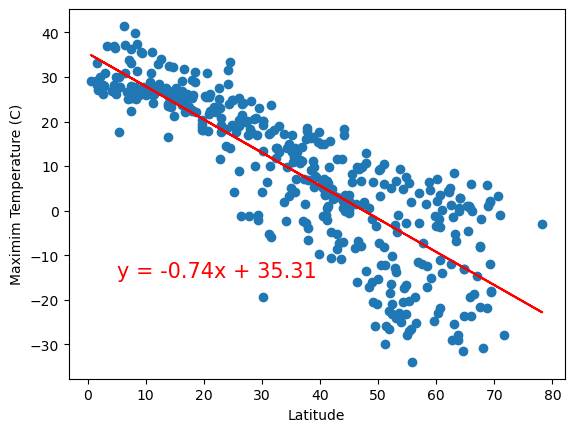

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_annotate = 5
y_annotate = -15


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Maximim Temperature (C)')


plt.show()

The r-value is 0.6475492962925365


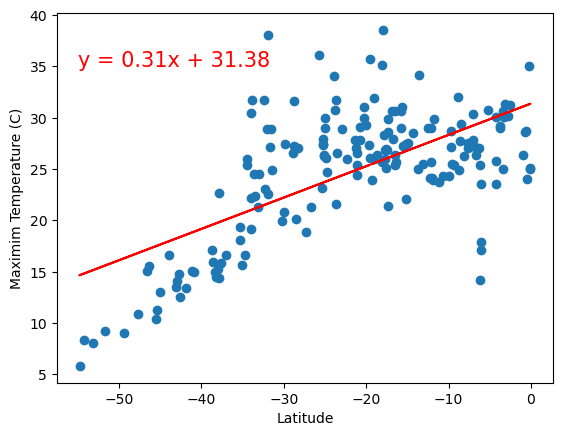

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_annotate = -55
y_annotate = 35


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Maximim Temperature (C)')
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, we see a negative linear relationship that tells us that as latitude increases, temperature decreases. The opposite occurs in the southern hemisphere. We see a positive relationship; as latitude increases, temperature also increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4328069187699809


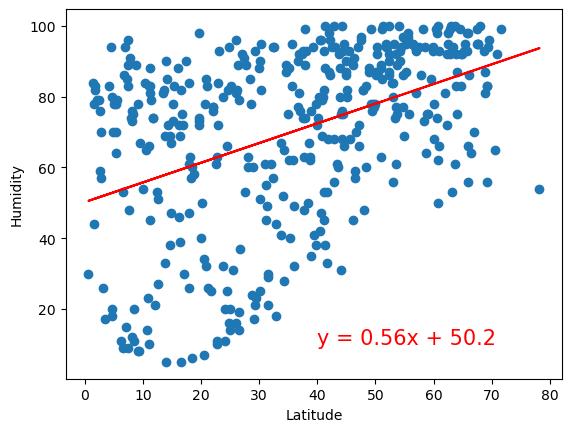

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_annotate = 40
y_annotate = 10


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is 0.14108017638985845


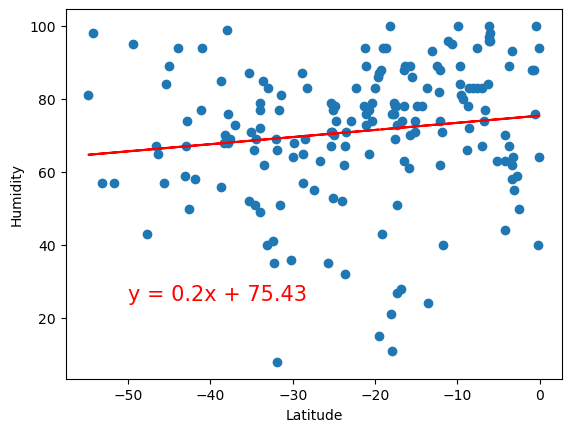

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_annotate = -50
y_annotate = 25

linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


**Discussion about the linear relationship:** In both southern and northern hemispheres, we see a positive linear relationships; as latitude increases, humidity also increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.17779252106478932


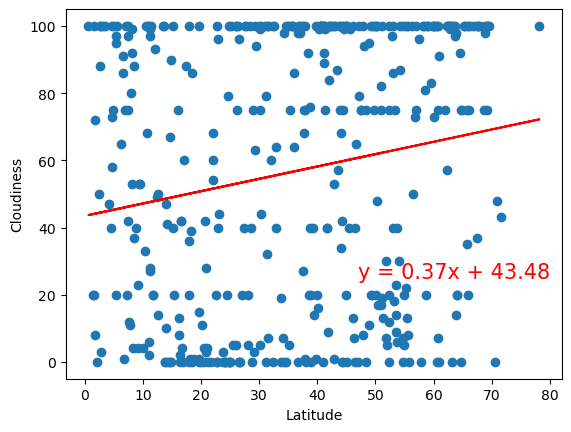

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_annotate = 47
y_annotate = 25


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is 0.1446214646561998


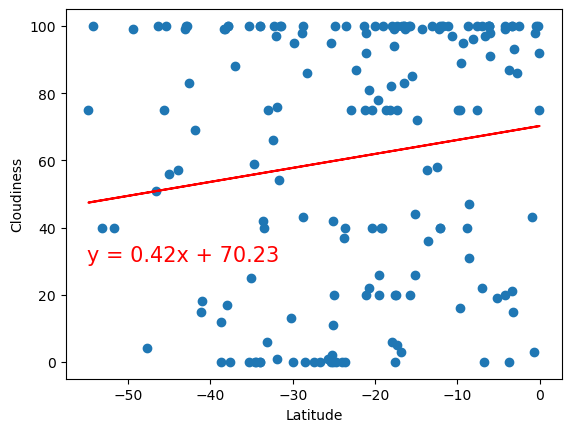

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_annotate = -55
y_annotate = 30

linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:**  In both southern and northern hemispheres, we see positive linear relationships; as as latitude increases, cloudiness also increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.05138255715165102


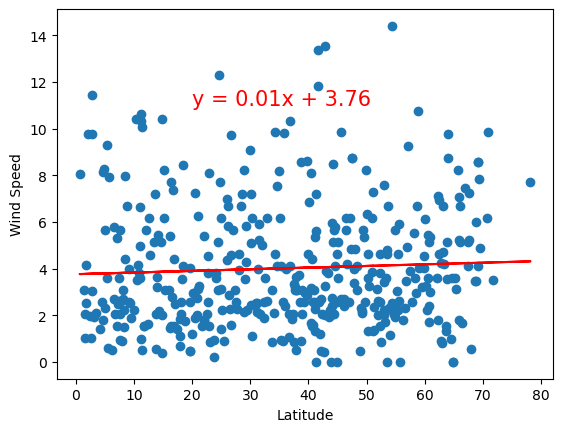

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_annotate = 20
y_annotate = 11


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is -0.387710030700192


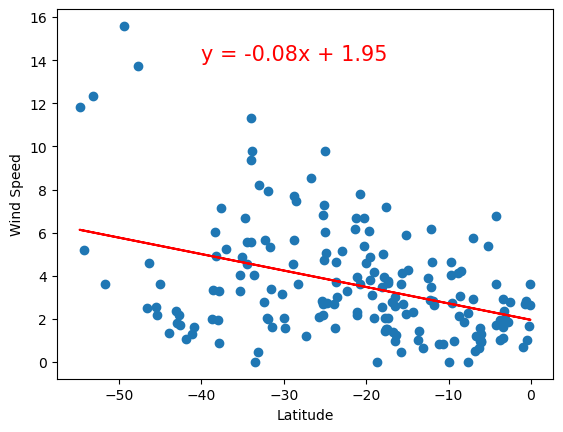

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_annotate = -40
y_annotate = 14

linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** In both southern and northern hemispheres, we see negative linear relationships; as latitude increases, wind speed decreases. The northern hemisphere does not see a change as strong as the southern hemisphere though.